# Project: Exploring Stock Performance - Analyzing Leading Entertainment Giants
## Class : STAT 206
## Final Project
## Project members: Pious Khemka and Vishesh Jaiprakash Shukla

In [2]:
# Install necessary modules
# !pip install pandas numpy matplotlib seaborn yfinance

In [3]:
# Importing the pandas library and aliasing it as 'pd'
import pandas as pd

# Importing the numpy library and aliasing it as 'np'
import numpy as np

# Importing the pyplot module from the matplotlib library and aliasing it as 'plt'
import matplotlib.pyplot as plt

# Importing the seaborn library and setting the plotting style to 'whitegrid'
import seaborn as sns
sns.set_style('whitegrid')

# Using the magic command '%matplotlib inline' to display matplotlib plots inline in Jupyter notebooks
%matplotlib inline

# Setting the style of matplotlib plots to emulate the style of plots found on FiveThirtyEight
plt.style.use("fivethirtyeight")

In [4]:
# For reading stock data from Yahoo Finance
import yfinance as yf
from datetime import datetime

[*********************100%%**********************]  1 of 1 completed





1/1 [==============================] - 2s 2s/step


C:\Users\EndUser\AppData\Local\Temp\ipykernel_29136\1818886175.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


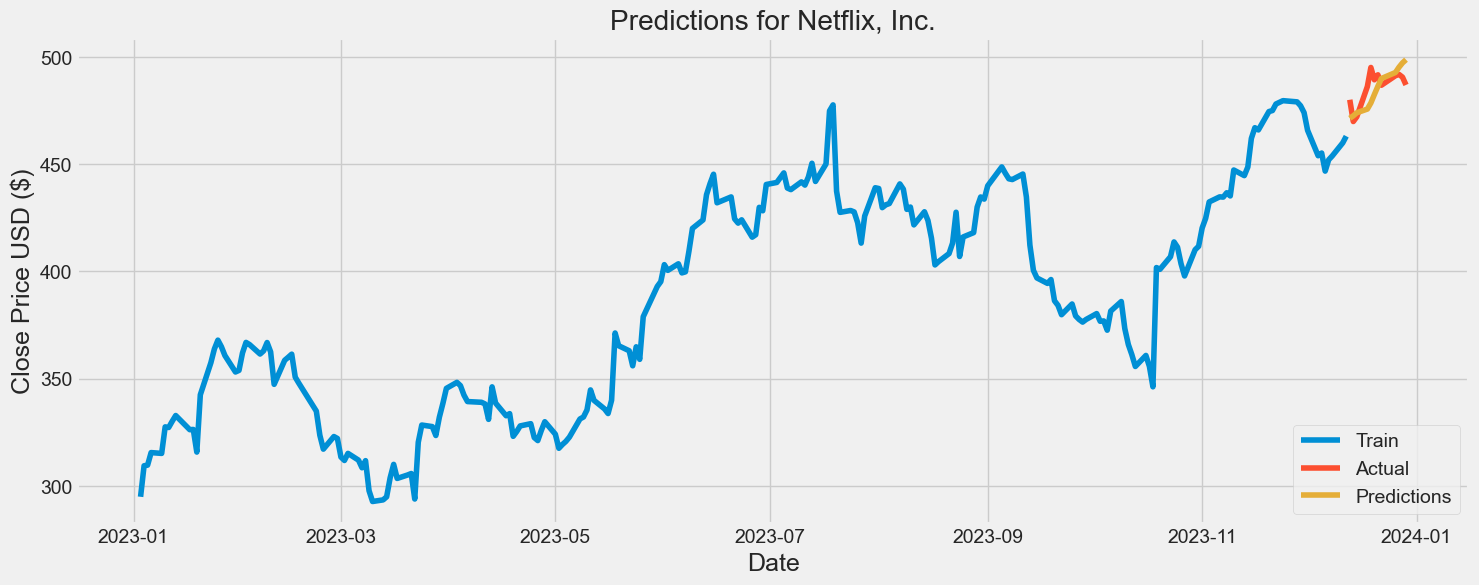

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-13  461.980011  481.250000  461.980011  479.980011  479.980011   
2023-12-14  480.359985  480.760010  464.760010  469.829987  469.829987   
2023-12-15  467.299988  473.000000  467.299988  472.059998  472.059998   
2023-12-18  476.299988  492.040009  475.100006  486.119995  486.119995   
2023-12-19  488.399994  496.140015  484.059998  495.019989  495.019989   
2023-12-20  492.000000  500.890015  488.390015  489.269989  489.269989   
2023-12-21  492.660004  494.399994  486.769989  491.609985  491.609985   
2023-12-22  494.000000  496.019989  485.450012  486.760010  486.760010   
2023-12-26  489.390015  491.480011  486.380005  491.190002  491.190002   
2023-12-27  491.239990  494.019989  489.250000  491.790009  491.790009   
2023-12-28  492.000000  492.890015  489.070007  490.510010  490.510010   
2023-12-29  490.369995  492.230011  48

In [5]:
#!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Function to get stock data
def get_stock_data(symbol, start_date, end_date):
    return yf.download(symbol, start=start_date, end=end_date)

# Retrieving stock data for your company from Yahoo Finance
company_symbol = 'NFLX'
start_date = '2023-01-01'
end_date = '2023-12-31'
company_data = get_stock_data(company_symbol, start_date, end_date)

# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(company_data['Close'].values.reshape(-1, 1))

# Creating training dataset
training_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creating testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Making predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Visualizing the results
train = company_data[:training_data_len]
valid = company_data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Predictions for Netflix, Inc.')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

# Displaying the valid and predicted prices
print(valid)

In [6]:
# After making predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate validation targets (actual closing prices)
y_test = company_data['Close'].values[training_data_len:]

# Import error functions
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the error metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

1/1 [==============================] - 0s 83ms/step
Mean Squared Error (MSE): 62.441042313274615
Mean Absolute Error (MAE): 6.561408996582031
